### learning an OR gate using a perceptron model with a single neuron

#### OR Gate
x | y | z
--- | --- | ---
0 | 0 | 0
0 | 1 | 1
1 | 0 | 1
1 | 1 | 1

#### Perceptron Model
$$
\begin{align}
\hat{y} &= \begin{cases}
1 & \text{if } \sum_{i=1}^n w_ix_i + b > 0 \\
0 & \text{otherwise}
\end{cases} \\
\end{align}
$$

#### Training
$$
\begin{align}
\text{loss} &= \frac{1}{2}(\hat{y} - y)^2 \\
\frac{\partial \text{loss}}{\partial w_i} &= (\hat{y} - y) \frac{\partial \hat{y}}{\partial w_i} \\
&= (\hat{y} - y) x_i \\
\frac{\partial \text{loss}}{\partial b} &= (\hat{y} - y) \frac{\partial \hat{y}}{\partial b} \\
&= (\hat{y} - y) \\
\end{align}
$$

#### Update
$$
\begin{align}
w_i &= w_i - \alpha (\hat{y} - y) x_i \\
b &= b - \alpha (\hat{y} - y) \\
\end{align}
$$

#### Initialization
$$
\begin{align}
w_i &= 0 \\
b &= 0 \\
\end{align}
$$

#### Training Loop
$$
\begin{align}
\text{for } \text{epoch} \in \text{range(epochs)} \\
\text{for } (x, y) \in \text{zip(X, Y)} \\
\hat{y} &= \sum_{i=1}^n w_ix_i + b \\
\text{loss} &= \frac{1}{2}(\hat{y} - y)^2 \\
w_i &= w_i - \alpha (\hat{y} - y) x_i \\
b &= b - \alpha (\hat{y} - y) \\
\end{align}
$$

#### Prediction
$$
\begin{align}
\hat{y} &= \begin{cases}
1 & \text{if } \sum_{i=1}^n w_ix_i + b > 0 \\
0 & \text{otherwise}
\end{cases} \\
\end{align}







In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
class Perceptron:
    def __init__(self, alpha = 0.1, epochs = 100):
        self.alpha = alpha
        self.epochs = epochs
        self.bias = 0
        self.weights = None
        self.misclassified = None
        
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.misclassified = []
        
        for _ in range(self.epochs):
            misclassified = 0
            for xi, target in zip(X, y):
                update = self.alpha * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                misclassified += int(update != 0.0)
            self.misclassified.append(misclassified)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def plot_misclassified(self):
        plt.plot(range(1, len(self.misclassified) + 1), self.misclassified, marker = 'o')
        plt.xlabel('Epochs')
        plt.ylabel('Number of misclassified')
        plt.show()

Our Perceptron model is a single neuron with a single output. The output is a binary value, 0 or 1. The input is a vector of values, $x_1, x_2, \dots, x_n$. The weights are also a vector of values, $w_1, w_2, \dots, w_n$. The bias is a single value, $b$. The output is calculated as follows:

$$
\begin{align}
\hat{y} &= \begin{cases}
1 & \text{if } \sum_{i=1}^n w_ix_i + b > 0 \\
0 & \text{otherwise}
\end{cases} \\
\end{align}
$$


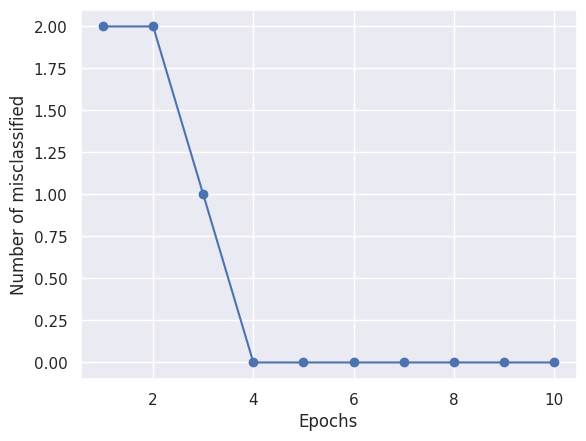

In [10]:
perceptron = Perceptron(epochs = 10)

# learning an OR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

perceptron.fit(X, y)
perceptron.plot_misclassified()

